# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [43]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [332]:
print('There are {} total human images'.format(len(human_files)))

There are 13233 total human images


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


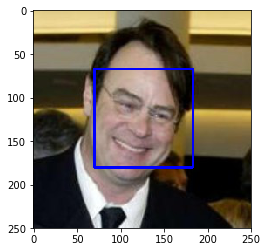

In [44]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [ ]:
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

In [160]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray)

In [ ]:
human_files[0]

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [333]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [335]:
face_detector(human_files_short[1])

True

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

What percentage of the first 100 images in human_files have a detected human face? 98

What percentage of the first 100 images in dog_files have a detected human face? 17

In [336]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#
n_faces_h=0
n_faces_d=0
for impath in tqdm(human_files_short):
    n_faces_h+= face_detector(impath)
    
for impath in tqdm(dog_files_short):
    n_faces_d+= face_detector(impath)
    
print(n_faces_h)
print(n_faces_d)
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.


100%|██████████| 100/100 [01:18<00:00,  4.03it/s]

98
17


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [337]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

In [338]:
use_cuda = torch.cuda.is_available()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

In [339]:
print(use_cuda)

False


### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [340]:
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    im = Image.open(img_path)
    preprocess = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                             std=[0.229, 0.224, 0.225])
        ])
    image1 = preprocess(im)
    #Added this line to convert 4 channel PNGs in final sample data to 3 channels
    image1 = image1[:3,:,:]
 #   print(image1.shape)
    image = image1.unsqueeze(0)

         
    op = VGG16(image)
    op1 = F.relu(op)
#    print(op1)
    _, predi = torch.max(op1, 1)
#     print(predi.shape)
#     print(predi)
#     print(predi.item())

    pred = op1.data.numpy().argmax()
#     print(pred)
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
#    print(image.shape)
    return pred # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [341]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    a= VGG16_predict(img_path)
    if a in range(151,269):
#        print("Dog found")
        return True
    else:
#        print("Dog not found")
        return False # true/false

In [344]:
dog_detector('/home/workspace/dog_project/test/Labrador_retriever_06449.jpg')

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  

5%

- What percentage of the images in `dog_files_short` have a detected dog?

97%

__Answer:__ 


In [345]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_d = 0
dog_h = 0
for impath in tqdm(human_files_short):
    a= VGG16_predict(impath)
    if a in range(151,269):
        dog_h+=1
print("{}/{} dogs detected in human files".format(dog_h,len(human_files_short)))

for impath in tqdm(dog_files_short):
    a= VGG16_predict(impath)
    if a in range(151,269):
        dog_d+=1

print("{}/{} dogs detected in dog files".format(dog_d,len(dog_files_short)))


  0%|          | 0/100 [00:00<?, ?it/s]

5/100 dogs detected in human files


100%|██████████| 100/100 [01:08<00:00,  1.47it/s]

97/100 dogs detected in dog files


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?

Used resize, center crop transformations to standardise the input image to 224*224
Took input tensor size to model as 224*224, since it standard used by other pretrained models. 


- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

Yes.. Basic augmentation was done through random horizontal flipping, and random rotation.

In [78]:

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

import torch
import os
from torchvision import datasets,transforms
from torch import utils
from tqdm import tqdm
from PIL import ImageFile
use_cuda = torch.cuda.is_available()
ImageFile.LOAD_TRUNCATED_IMAGES = True
batch_size=20
data_transforms = {
    'train' : transforms.Compose([
    transforms.Resize(224),transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    
    'valid' : transforms.Compose([
    transforms.Resize(224),transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    
    'test' : transforms.Compose([
    transforms.Resize(224),transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
}

train_dir = '/data/dog_images/train/'
valid_dir = '/data/dog_images/valid/'
test_dir =  '/data/dog_images/test/'

image_datasets = {
    'train' : datasets.ImageFolder(root=train_dir,transform=data_transforms['train']),
    'valid' : datasets.ImageFolder(root=valid_dir,transform=data_transforms['valid']),
    'test' : datasets.ImageFolder(root=test_dir,transform=data_transforms['test'])
}

# Loading Dataset
loaders_scratch = {
    'train' : torch.utils.data.DataLoader(image_datasets['train'],batch_size = batch_size,shuffle=True),
    'valid' : torch.utils.data.DataLoader(image_datasets['valid'],batch_size = batch_size),
    'test' : torch.utils.data.DataLoader(image_datasets['test'],batch_size = batch_size)    
}

In [ ]:
class_names = image_datasets['train'].classes
print(len(loaders_scratch['train'].dataset))
print(len(loaders_scratch['valid'].dataset))
print(len(loaders_scratch['test'].dataset))

In [ ]:
def imshow(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)    
    plt.imshow(inp)
    
# Get a batch of training data
images, classes = next(iter(loaders_scratch['train']))
      
fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(class_names[classes[idx]].split(".")[1])

**Answer**:

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [80]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3,16,3,padding=1)
        self.conv2 = nn.Conv2d(16,32,3,padding=1)
        self.conv3 = nn.Conv2d(32,64,3,padding=1)
        self.conv4 = nn.Conv2d(64,128,3,padding=1)
        self.conv5 = nn.Conv2d(128,256,3,padding=1)
        self.pool  = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(12544,512)
        self.fc2 = nn.Linear(512,133)
        self.dropout = nn.Dropout(0.2)
        self.conv_bn1 = nn.BatchNorm2d(3,16)
        self.conv_bn2 = nn.BatchNorm2d(16)
        self.conv_bn3 = nn.BatchNorm2d(32)
        self.conv_bn4 = nn.BatchNorm2d(64)
        self.conv_bn5 = nn.BatchNorm2d(128)
        self.conv_bn6 = nn.BatchNorm2d(256)

    def forward(self, x):
        ## Define forward behavior
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.conv_bn2(x)
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.conv_bn3(x)
#         x = self.pool(F.relu(self.conv3(x)))
#         x = self.conv_bn4(x)
#         x = self.pool(F.relu(self.conv4(x)))
#         x = self.conv_bn5(x)
#         x = self.pool(F.relu(self.conv5(x)))
#         x = self.conv_bn6(x)
        x = self.pool(self.conv_bn2(F.relu(self.conv1(x))))
#        x = self.conv_bn2(x)
        x = self.pool(self.conv_bn3(F.relu(self.conv2(x))))
#        x = self.conv_bn3(x)
        x = self.pool(self.conv_bn4(F.relu(self.conv3(x))))
#        x = self.conv_bn4(x)
        x = self.pool(self.conv_bn5(F.relu(self.conv4(x))))
#        x = self.conv_bn5(x)
        x = self.pool(self.conv_bn6(F.relu(self.conv5(x))))
#        x = self.conv_bn6(x)
        x = x.view(-1,256*7*7)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
#        x = self.dropout(F.relu(self.fc3(x)))
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

Increased depth of CNN step by step ,
from input channel size of 3 to 16, 160 to 32, then to 64, 128 and 256. Search revealed it is standard practice. Suitable padding size of 1 was given to retain size in Convolution layer.. 
Relu activation function was used at output of convolution layer.

Batch normalisation was applied after activations in each hidden convolution layer to improve perfomance( as per research done).
Subsequently down sampling was done by max pooling layer with kernel size of 2 and stride of 2.

After flattening output from above feature layer, drop out layer with probability 20%  was applied before feeding to linear layer. This followed another relu activation function. And a dropout layer. 

And a final linear layer which gives score.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [81]:
import torch.optim as optim
import numpy as np

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = torch.optim.Adam(model_scratch.parameters(),lr=0.001)
#loaders_scratch = {'train': train_loader, 'valid' : valid_loader, 'test': test_loader}

In [11]:
from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer_scratch, step_size=1, gamma=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [12]:
##Train without scheduler##
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output,target)
            loss.backward()
            optimizer.step()
#            train_loss+= loss.item()*data.size(0)
#                 print(data.size(0))
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
#             if batch_idx %50 ==0:
#                 print("{}, \t{}".format(batch_idx,train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output,target)
#            valid_loss+= loss.item()*data.size(0)
#                 print(loss.item())
#                 print(data.size(0))
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
#             if batch_idx %50 ==0:
#                 print('{},\t{},\t'.format(batch_idx,valid_loss))

            
        # print training/validation statistics 
#         train_loss = train_loss/len(loaders['train'].dataset)
#         valid_loss = valid_loss/len(loaders['valid'].dataset)
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased from ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(),save_path)
            valid_loss_min = valid_loss
                
    # return trained model
    return model



In [13]:
# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch,
                      criterion_scratch, use_cuda, 'model_scratch.pt')

  5%|▌         | 1/20 [01:36<30:28, 96.26s/it]

Epoch: 1 	Training Loss: 4.817000 	Validation Loss: 4.468177
Validation loss decreased from (inf --> 4.468177).  Saving model ...


 10%|█         | 2/20 [03:12<28:52, 96.22s/it]

Epoch: 2 	Training Loss: 4.422906 	Validation Loss: 4.333202
Validation loss decreased from (4.468177 --> 4.333202).  Saving model ...


 15%|█▌        | 3/20 [04:48<27:15, 96.20s/it]

Epoch: 3 	Training Loss: 4.218813 	Validation Loss: 4.307681
Validation loss decreased from (4.333202 --> 4.307681).  Saving model ...


 20%|██        | 4/20 [06:24<25:39, 96.22s/it]

Epoch: 4 	Training Loss: 4.068614 	Validation Loss: 4.059412
Validation loss decreased from (4.307681 --> 4.059412).  Saving model ...


 25%|██▌       | 5/20 [08:01<24:04, 96.27s/it]

Epoch: 5 	Training Loss: 3.917421 	Validation Loss: 4.071048


 30%|███       | 6/20 [09:37<22:26, 96.21s/it]

Epoch: 6 	Training Loss: 3.783088 	Validation Loss: 3.749612
Validation loss decreased from (4.059412 --> 3.749612).  Saving model ...


 35%|███▌      | 7/20 [11:13<20:49, 96.14s/it]

Epoch: 7 	Training Loss: 3.612674 	Validation Loss: 3.669323
Validation loss decreased from (3.749612 --> 3.669323).  Saving model ...


 40%|████      | 8/20 [12:49<19:14, 96.17s/it]

Epoch: 8 	Training Loss: 3.469608 	Validation Loss: 3.744668


 45%|████▌     | 9/20 [14:25<17:37, 96.12s/it]

Epoch: 9 	Training Loss: 3.336300 	Validation Loss: 3.591237
Validation loss decreased from (3.669323 --> 3.591237).  Saving model ...


 50%|█████     | 10/20 [16:00<15:58, 95.87s/it]

Epoch: 10 	Training Loss: 3.193071 	Validation Loss: 3.503646
Validation loss decreased from (3.591237 --> 3.503646).  Saving model ...


 55%|█████▌    | 11/20 [17:36<14:22, 95.78s/it]

Epoch: 11 	Training Loss: 3.032667 	Validation Loss: 3.446754
Validation loss decreased from (3.503646 --> 3.446754).  Saving model ...


 60%|██████    | 12/20 [19:10<12:43, 95.41s/it]

Epoch: 12 	Training Loss: 2.860250 	Validation Loss: 3.633460


 65%|██████▌   | 13/20 [20:45<11:06, 95.24s/it]

Epoch: 13 	Training Loss: 2.720024 	Validation Loss: 3.478085


 70%|███████   | 14/20 [22:20<09:30, 95.17s/it]

Epoch: 14 	Training Loss: 2.537189 	Validation Loss: 3.419976
Validation loss decreased from (3.446754 --> 3.419976).  Saving model ...


 75%|███████▌  | 15/20 [23:55<07:55, 95.07s/it]

Epoch: 15 	Training Loss: 2.392724 	Validation Loss: 3.465512


 80%|████████  | 16/20 [25:30<06:19, 94.89s/it]

Epoch: 16 	Training Loss: 2.266214 	Validation Loss: 3.383295
Validation loss decreased from (3.419976 --> 3.383295).  Saving model ...


 85%|████████▌ | 17/20 [27:04<04:43, 94.66s/it]

Epoch: 17 	Training Loss: 2.064038 	Validation Loss: 3.515890


 90%|█████████ | 18/20 [28:38<03:09, 94.56s/it]

Epoch: 18 	Training Loss: 1.914986 	Validation Loss: 3.495190


 95%|█████████▌| 19/20 [30:12<01:34, 94.47s/it]

Epoch: 19 	Training Loss: 1.791785 	Validation Loss: 3.604365


100%|██████████| 20/20 [31:47<00:00, 94.50s/it]

Epoch: 20 	Training Loss: 1.632469 	Validation Loss: 3.648440


In [346]:
# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))
model_scratch.load_state_dict(torch.load('model_scratch.pt', map_location=lambda storage, loc: storage))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))



In [16]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.329599


Test Accuracy: 23% (197/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [1]:
## TODO: Specify data loaders

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

import torch
import os
import numpy as np
from torchvision import datasets,transforms
from torch import utils
from tqdm import tqdm
from PIL import ImageFile
use_cuda = torch.cuda.is_available()
ImageFile.LOAD_TRUNCATED_IMAGES = True
batch_size=20
data_transforms = {
    'train' : transforms.Compose([
    transforms.Resize(224),transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    
    'valid' : transforms.Compose([
    transforms.Resize(256),transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    
    'test' : transforms.Compose([
    transforms.Resize(256),transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
}

train_dir = '/data/dog_images/train/'
valid_dir = '/data/dog_images/valid/'
test_dir =  '/data/dog_images/test/'

image_datasets = {
    'train' : datasets.ImageFolder(root=train_dir,transform=data_transforms['train']),
    'valid' : datasets.ImageFolder(root=valid_dir,transform=data_transforms['valid']),
    'test' : datasets.ImageFolder(root=test_dir,transform=data_transforms['test'])
}

# Loading Dataset
loaders_transfer = {
    'train' : torch.utils.data.DataLoader(image_datasets['train'],batch_size = batch_size,shuffle=True),
    'valid' : torch.utils.data.DataLoader(image_datasets['valid'],batch_size = batch_size),
    'test' : torch.utils.data.DataLoader(image_datasets['test'],batch_size = batch_size)    
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [27]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet18(pretrained=True)
for param in model_transfer.parameters():
    param.requires_grad = False
    
# for param in model_transfer.fc.parameters():
#     param.requires_grad = True
num_ftrs = model_transfer.fc.in_features
model_transfer.fc = nn.Linear(num_ftrs, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()
    


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

Used resne18 model trained on imagenet dataset. Referenced some other work done using resnet and this was found to give decent perfomance. 

Since it is a pretrained model, the feature extraction layer need not be retrained to update weights. Hence set parameters requires_grad as false to freeze the parameters

However the final layer (fc1, which had 1000 out_features) needed to be replaced with another layer that had 133 to suit problem in hand. Finally model gets transferred to GPU if enabled

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [24]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.Adam(model_transfer.fc.parameters(),lr=0.001)
from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer_transfer, step_size=1, gamma=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [4]:
# train the model
n_epochs=20
def train(n_epochs, loaders, model, optimizer,schdeduler, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        scheduler.step()
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output,target)
            loss.backward()
            optimizer.step()
                #train_loss+= loss.item()*data.size(0)
#                 print(data.size(0))
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
#             if batch_idx %50 ==1:
#                 print("{}, \t{},\t {} \t {}".format(batch_idx,loss.item(),data.size(0),train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output,target)
                #valid_loss+= loss.item()*data.size(0)
#                 print(loss.item())
#                 print(data.size(0))
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
#             if batch_idx %50 ==1:
#                 print('{},\t{},\t {} \t {}'.format(batch_idx,loss.item(),data.size(0),valid_loss))

            
        # print training/validation statistics 
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased from ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(),save_path)
            valid_loss_min = valid_loss
                
    # return trained model
    return model



model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer,scheduler, criterion_transfer, use_cuda, 'model_transfer.pt')


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 0.000394 	Validation Loss: 0.001496
Validation loss decreased from (inf --> 0.001496).  Saving model ...


 10%|█         | 2/20 [03:30<32:33, 108.53s/it]

Epoch: 2 	Training Loss: 0.000174 	Validation Loss: 0.001264
Validation loss decreased from (0.001496 --> 0.001264).  Saving model ...


 15%|█▌        | 3/20 [05:06<29:44, 104.96s/it]

Epoch: 3 	Training Loss: 0.000160 	Validation Loss: 0.001265


 20%|██        | 4/20 [06:43<27:18, 102.40s/it]

Epoch: 4 	Training Loss: 0.000159 	Validation Loss: 0.001273


 25%|██▌       | 5/20 [08:19<25:10, 100.72s/it]

Epoch: 5 	Training Loss: 0.000160 	Validation Loss: 0.001270


 30%|███       | 6/20 [09:55<23:10, 99.30s/it] 

Epoch: 6 	Training Loss: 0.000160 	Validation Loss: 0.001268


 35%|███▌      | 7/20 [11:32<21:18, 98.37s/it]

Epoch: 7 	Training Loss: 0.000160 	Validation Loss: 0.001283


 40%|████      | 8/20 [13:08<19:32, 97.71s/it]

Epoch: 8 	Training Loss: 0.000159 	Validation Loss: 0.001263
Validation loss decreased from (0.001264 --> 0.001263).  Saving model ...


 45%|████▌     | 9/20 [14:43<17:46, 96.96s/it]

Epoch: 9 	Training Loss: 0.000160 	Validation Loss: 0.001271


 50%|█████     | 10/20 [16:17<16:00, 96.01s/it]

Epoch: 10 	Training Loss: 0.000159 	Validation Loss: 0.001249
Validation loss decreased from (0.001263 --> 0.001249).  Saving model ...


 55%|█████▌    | 11/20 [17:54<14:26, 96.26s/it]

Epoch: 11 	Training Loss: 0.000160 	Validation Loss: 0.001243
Validation loss decreased from (0.001249 --> 0.001243).  Saving model ...


 60%|██████    | 12/20 [19:30<12:50, 96.33s/it]

Epoch: 12 	Training Loss: 0.000159 	Validation Loss: 0.001258


 65%|██████▌   | 13/20 [21:06<11:13, 96.19s/it]

Epoch: 13 	Training Loss: 0.000159 	Validation Loss: 0.001265


 70%|███████   | 14/20 [22:42<09:36, 96.10s/it]

Epoch: 14 	Training Loss: 0.000159 	Validation Loss: 0.001265


 75%|███████▌  | 15/20 [24:17<07:58, 95.68s/it]

Epoch: 15 	Training Loss: 0.000159 	Validation Loss: 0.001276


 80%|████████  | 16/20 [25:52<06:22, 95.71s/it]

Epoch: 16 	Training Loss: 0.000159 	Validation Loss: 0.001258


 85%|████████▌ | 17/20 [27:30<04:48, 96.24s/it]

Epoch: 17 	Training Loss: 0.000159 	Validation Loss: 0.001276


 90%|█████████ | 18/20 [29:07<03:13, 96.61s/it]

Epoch: 18 	Training Loss: 0.000160 	Validation Loss: 0.001259


 95%|█████████▌| 19/20 [30:45<01:36, 96.89s/it]

Epoch: 19 	Training Loss: 0.000160 	Validation Loss: 0.001271


100%|██████████| 20/20 [32:22<00:00, 96.96s/it]

Epoch: 20 	Training Loss: 0.000160 	Validation Loss: 0.001272


In [28]:
# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location=lambda storage, loc: storage))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [29]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))



In [30]:
#model_transfer.cpu()
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.020235


Test Accuracy: 76% (643/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [320]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]

def predict_breed_transfer(img_path,model=model_transfer):
    im = Image.open(img_path)
    data_transforms = transforms.Compose([
    transforms.Resize(256),transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    im1 = data_transforms(im)
#     if im1.shape[0]>3:
#         im1.shape[0]=3
#    im1 = im1[:3]
    im1 = im1[:3,:,:].unsqueeze(0)
#    im1 = im1.unsqueeze(0)
    output = model_transfer(im1)
        # calculate the loss
        # convert output probabilities to predicted class
    pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label    
#    print('Predicted breed: {}\n'.format(class_names[pred]))

    
    # load the image and return the predicted breed
   # plt.imshow(im)
    return class_names[pred.item()]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [368]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    img = Image.open(img_path)
    
#     if len(img.size) > 2 and img.size[2] == 4:
#     #convert the image from RGBA2RGB
#         img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    human = face_detector(img_path)
    dog = dog_detector(img_path)
    dog_breed = predict_breed_transfer(img_path)
    if human>0:
        print("Hi Human")
        print("You look like \n {}".format(dog_breed))
    elif dog==True:
        print("Breed of dog detected is.. \n {}".format(dog_breed))
    else:
        print("Sorry.. Could not identify dog or human")
    ## handle cases for a human face, dog, and neither
    plt.imshow(img)
    plt.show()
    return None


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Output is in expected lines. It processed 4 and 3 channel images. Correctly detecting humans and dogs. Breeds I am not sure. Though looks correct

a. Can improve algorithm using LR scheduling for faster training and convergence

b. Can deep dive into each layer output to see features captured and missed and try new transformations accordingly

c. d. Already added batch normalisatin, and can experiment on adding layers based on above step

d. Sample human like figures (cartoon below) is not detected. Can improve the detection by training with such images or including similar haar cascade face templates


Hi Human
You look like 
 Cavalier king charles spaniel
Hi Human
You look like 
 Dalmatian
Hi Human
You look like 
 Chinese crested
Breed of dog detected is.. 
 Mastiff
Breed of dog detected is.. 
 Bullmastiff
Breed of dog detected is.. 
 Mastiff


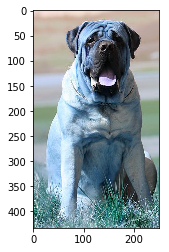

In [186]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [371]:
from glob import glob
test_file = glob('/home/workspace/dog_project/test/*')
len(test_file)

14

In [372]:
test_file

['/home/workspace/dog_project/test/sample_dog_output.jpg',
 '/home/workspace/dog_project/test/zphoto-1461800919507-79b16743b257.jpeg',
 '/home/workspace/dog_project/test/cartoon.jpeg',
 '/home/workspace/dog_project/test/Labrador_retriever_06455.jpg',
 '/home/workspace/dog_project/test/test_dog.png',
 '/home/workspace/dog_project/test/Labrador_retriever_06449.jpg',
 '/home/workspace/dog_project/test/IMG_7817.JPG',
 '/home/workspace/dog_project/test/dog3.jpg',
 '/home/workspace/dog_project/test/sample_human_output.jpg',
 '/home/workspace/dog_project/test/Labrador_retriever_06457.jpg',
 '/home/workspace/dog_project/test/20141215_143637.jpeg',
 '/home/workspace/dog_project/test/dog1.jpg',
 '/home/workspace/dog_project/test/sample_dog_output.png',
 '/home/workspace/dog_project/test/dog2.jpg']

Breed of dog detected is.. 
 Entlebucher mountain dog


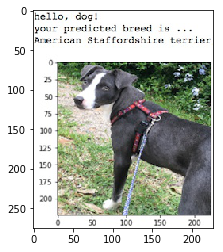

Hi Human
You look like 
 American foxhound


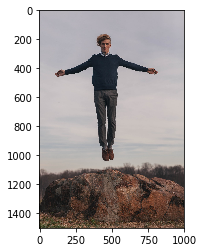

Sorry.. Could not identify dog or human


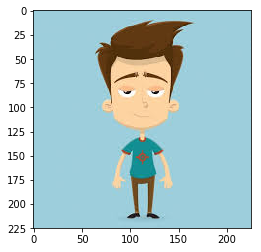

Breed of dog detected is.. 
 Labrador retriever


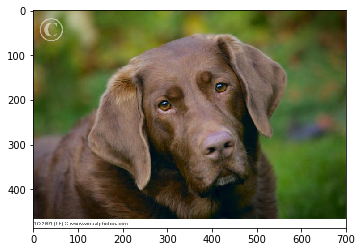

Hi Human
You look like 
 Chinese crested


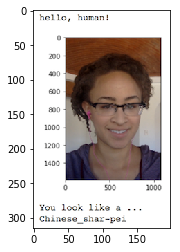

Breed of dog detected is.. 
 Labrador retriever


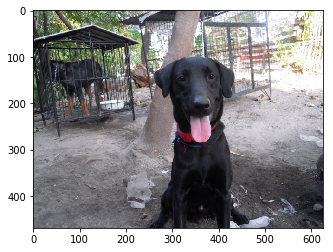

Hi Human
You look like 
 Italian greyhound


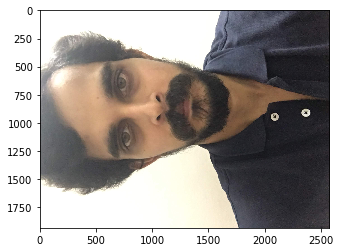

Breed of dog detected is.. 
 Golden retriever


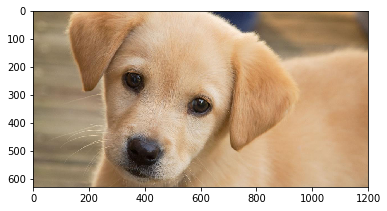

Hi Human
You look like 
 Chinese crested


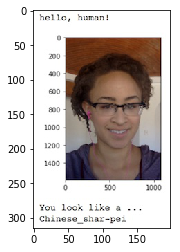

Breed of dog detected is.. 
 Labrador retriever


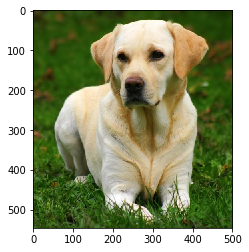

Hi Human
You look like 
 Chinese crested


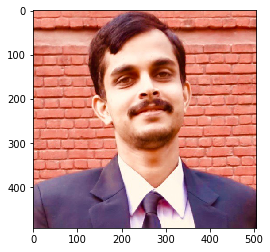

Breed of dog detected is.. 
 Norfolk terrier


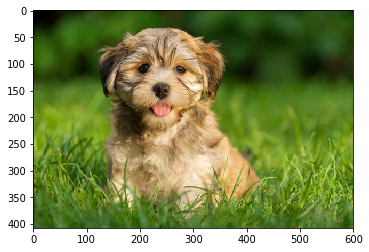

Breed of dog detected is.. 
 Entlebucher mountain dog


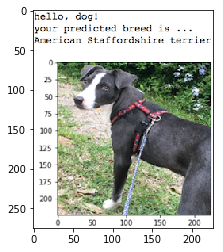

Breed of dog detected is.. 
 Golden retriever


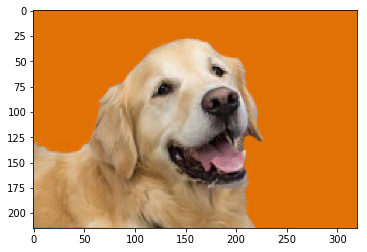

In [373]:
for impath in test_file:
    run_app(impath)